# Predicting Gross Profit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Expected revenue for this year = 170mill usd 
* Standard deviation of the figure = 20mill usd
* 1000 observation during the simulation

In [2]:
revenue_mean = 170
revenue_stdev = 20
iterations = 1000

In [3]:
future_revenue = np.random.normal(revenue_mean, revenue_stdev, iterations)
future_revenue

array([158.19174741, 154.26142804, 199.27050837, 174.07943422,
       208.0004604 , 152.75209596, 165.58508525, 163.08500461,
       189.49079437, 159.9036031 , 200.05051535, 107.93149125,
       159.90300889, 183.92852965, 146.44133971, 162.02303803,
       160.79357746, 187.98480371, 178.82496504, 159.45417356,
       146.15220694, 175.92571847, 159.5536741 , 184.82952057,
       158.8741244 , 183.09612205, 205.89484283, 173.61977207,
       174.87298416, 124.28828356, 152.2523794 , 164.99938209,
       158.75037359, 151.17836152, 190.66361143, 161.35419759,
       177.61942003, 202.7330249 , 177.13635995, 135.4297262 ,
       184.94642137, 161.33805416, 189.82516359, 169.13846393,
       216.86121288, 168.76707601, 175.71034315, 171.71752273,
       152.66438654, 216.35064805, 185.48979767, 170.73995337,
       178.7798055 , 153.13328699, 164.9629814 , 183.64555985,
       179.97853302, 200.0594054 , 185.04739978, 169.80045982,
       208.05263621, 169.53456382, 153.51564945, 146.06

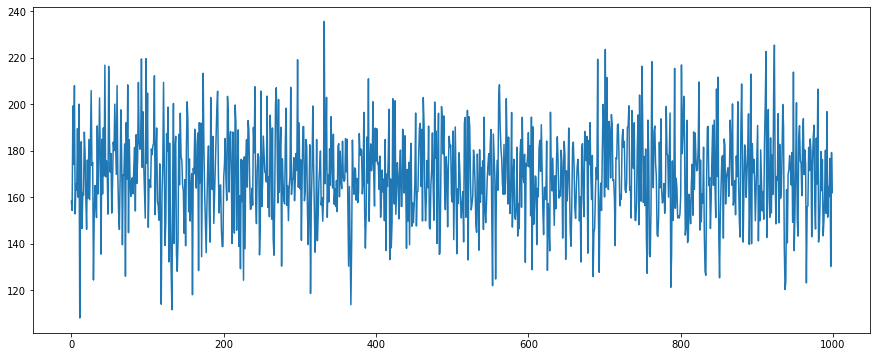

In [4]:
plt.figure(figsize = (15,6))
plt.plot(future_revenue)
plt.show()

***
***
* COGS mean = 60% (0.6)
* COGS std  = 10% (0.1)
***
* COGS won't be simlated 1000 times (as the revenues were already simulated 1000 times)
* instead we must assigne a random COGS value to each one of the simulated values above (1000)

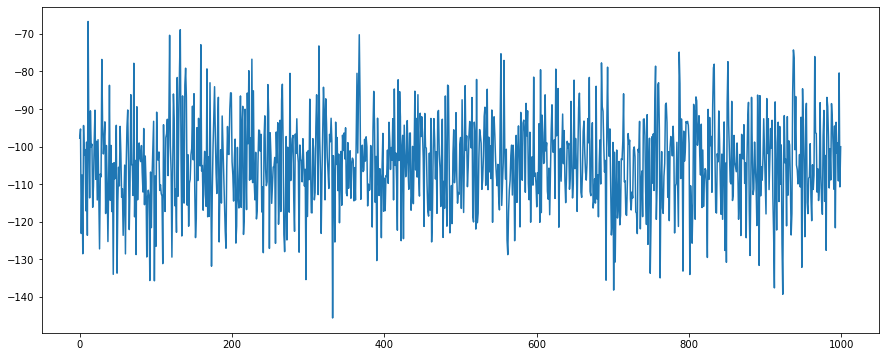

In [5]:
COGS = - (future_revenue * np.random.normal(0.6, 0.1,))

plt.figure(figsize = (15,6))
plt.plot(COGS)
plt.show()

In [6]:
COGS.mean()

-104.45721995374151

In [7]:
COGS.std()

12.261330678539872

* The std of COGS must be around 10% around its mean

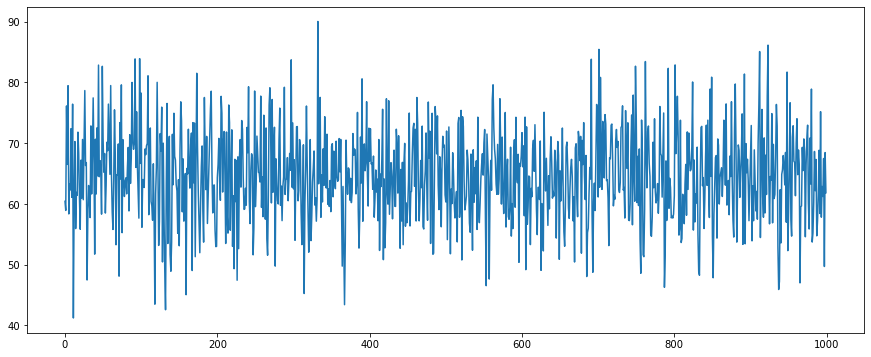

In [8]:
Gross_profit = future_revenue + COGS

plt.figure(figsize=(15,6))
plt.plot(Gross_profit)
plt.show()

In [9]:
max(Gross_profit)

90.03280362481988

In [10]:
min(Gross_profit)

41.234257503935765

In [11]:
Gross_profit.mean()

64.57862888602892

In [12]:
Gross_profit.std()

7.5803273712335235

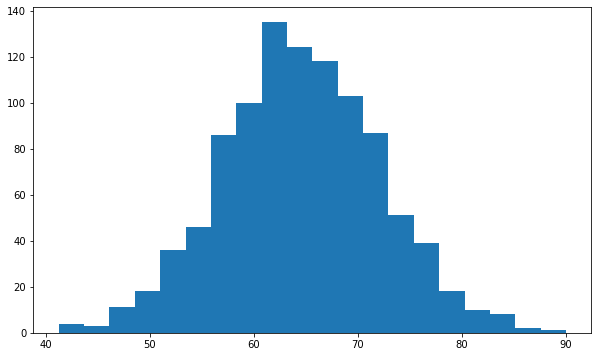

In [13]:
plt.figure(figsize=(10,6));
plt.hist(Gross_profit, bins=20);
plt.show()

# Forecasting stock prices

In [14]:
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [15]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-01-01')['Adj Close']

data

,PG
Date,
2007-01-03,42.110992
2007-01-04,41.791286
2007-01-05,41.432423
2007-01-08,41.523769
2007-01-09,41.419369
...,...
2021-05-10,137.669998
2021-05-11,136.990005
2021-05-12,135.539993


##### Note: another way of calculating log returns

In [16]:
log_returns = np.log(1 + data.pct_change())

In [17]:
log_returns.tail()

,PG
Date,
2021-05-10,0.018474
2021-05-11,-0.004952
2021-05-12,-0.010641
2021-05-13,0.015956
2021-05-14,0.002103


<AxesSubplot:xlabel='Date'>

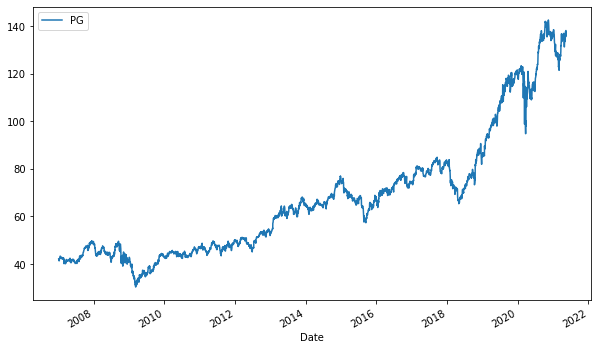

In [18]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

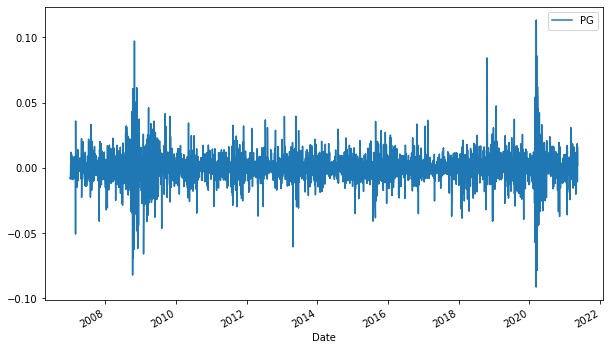

In [19]:
log_returns.plot(figsize=(10,6))

### Setting up the Brownian motion

In [20]:
u = log_returns.mean()
u

PG    0.000328
dtype: float64

In [21]:
var = log_returns.var()
var

PG    0.00014
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [22]:
drift = u - (0.5 * var)
drift

PG    0.000258
dtype: float64

In [23]:
std_dev = log_returns.std()
std_dev

PG    0.011843
dtype: float64

### Checking their types before converting into np arrays

In [24]:
type(drift)
type(std_dev)

pandas.core.series.Series

In [25]:
np.array(drift)

array([0.00025814])

* the .values method brings the same result

In [26]:
drift.values

array([0.00025814])

In [27]:
std_dev.values

array([0.01184317])

### Creating the (Z) random variable
* e.g. if an event has 95% chnace of occuring, the distance between this event and the mean will be approximately 1.64 standard deviations

***

In [28]:
norm.ppf(0.95)

1.6448536269514722

***

In [29]:
x = np.random.rand(10,2)
x

array([[0.8268411 , 0.47241876],
       [0.22384833, 0.74472133],
       [0.13730692, 0.08112389],
       [0.72103062, 0.71126004],
       [0.88278283, 0.4958338 ],
       [0.94608993, 0.68937771],
       [0.96165483, 0.49162982],
       [0.03174282, 0.28939213],
       [0.22892613, 0.74752451],
       [0.89451764, 0.44841473]])

In [30]:
norm.ppf(x)

array([[ 0.94175558, -0.06919109],
       [-0.75926063,  0.65797012],
       [-1.09249899, -1.39755152],
       [ 0.5859059 ,  0.55706954],
       [ 1.18901353, -0.01044331],
       [ 1.60806864,  0.49408722],
       [ 1.77022101, -0.02098246],
       [-1.85577503, -0.5551614 ],
       [-0.74238806,  0.66672003],
       [ 1.25091713, -0.12966754]])

In [31]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.38580553,  0.17790099],
       [-2.24928754, -0.60309517],
       [ 2.68999925, -0.46012184],
       [-1.65665933, -1.2506217 ],
       [ 0.32162399,  1.41409544],
       [-1.66356938,  0.16111217],
       [ 0.79879184, -0.66327539],
       [ 0.36476583,  0.75000816],
       [ 0.66614596, -0.41468218],
       [ 0.4762995 ,  0.5050527 ]])

### Now that all the elements are given, the final equation can be calculated

In [32]:
time_interval = 1000
iterations = 10

 $$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [33]:
daily_returns = np.exp(drift.values + std_dev.values * norm.ppf(np.random.rand(time_interval, iterations)))
daily_returns

array([[0.99499966, 1.01297702, 1.00386039, ..., 0.98998067, 0.99596682,
        1.01316357],
       [0.98903222, 0.98837244, 1.01138197, ..., 0.97177282, 1.00426509,
        0.99744921],
       [1.00089061, 1.00735883, 1.00231137, ..., 1.01630966, 1.00072419,
        0.99219542],
       ...,
       [1.00144535, 1.00628825, 1.00068624, ..., 1.00516367, 0.99599157,
        1.00044577],
       [0.98068654, 1.01891284, 1.00849997, ..., 1.01117468, 0.99321553,
        0.99115768],
       [1.0022944 , 1.01208191, 1.0059729 , ..., 0.99994749, 0.98929926,
        0.99208968]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$

* S0 is the current market price as of the day of the simulation (= the last element in our dataset)

In [34]:
S0 = data.iloc[-1]
S0

PG    138.009995
Name: 2021-05-14 00:00:00, dtype: float64

In [40]:
S1 = data.iloc[-1]
S1

PG    138.009995
Name: 2021-05-14 00:00:00, dtype: float64

* .zeros_like method allows us to maintain the same size of array as we had in the daily returns array

In [41]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* now we have to replace the zero values with the actual predicted values
* setting the first row of the price list as S0 since all of the predicted scenarios will start with the latest stock price as of the day of the simulation

In [44]:
price_list[0] = S0
price_list

array([[138.00999451, 138.00999451, 138.00999451, ..., 138.00999451,
        138.00999451, 138.00999451],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

* now we need to replace the formula that was mentioned above

In [45]:
for t in range (1, time_interval):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [46]:
price_list

array([[138.00999451, 138.00999451, 138.00999451, ..., 138.00999451,
        138.00999451, 138.00999451],
       [136.49633188, 136.40527488, 139.58082031, ..., 134.11436115,
        138.59861936, 137.65796034],
       [136.6178966 , 137.40905842, 139.90344329, ..., 136.30172118,
        138.69899045, 136.58359729],
       ...,
       [241.51169169, 371.85263589, 303.38175812, ..., 106.09190115,
        194.89657716, 361.97456308],
       [236.8472644 , 378.8854252 , 305.96049384, ..., 107.27744467,
        193.57430814, 358.77386665],
       [237.39068691, 383.46308343, 307.78796578, ..., 107.27181187,
        191.50292023, 355.93585007]])

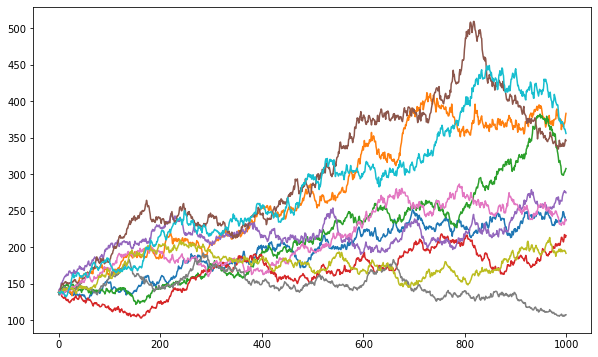

In [47]:
plt.figure(figsize=(10,6));
plt.plot(price_list);